In [13]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import keras
import imageio # To read images
from PIL import Image # For image resizing 


Next, let us read the train and test data sets into separate pandas DataFrames as shown below:

In [14]:
# Reading the data
train = pd.read_csv('agedetectiontrain/train.csv')
test = pd.read_csv('agedetectiontest/test.csv')


Once, both the data sets are read successfully, we can display any random movie character along with their age group to verify the ID against the Class value, as shown below:

In [15]:
temp = []
for img_name in train.ID:
    img_path = os.path.join('agedetectiontrain/Train', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)
train_x = np.stack(temp)


C:\Users\anaswara\AppData\Local\Temp\ipykernel_6536\4160517167.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


Next, we can start transforming the data sets to a one-dimensional array after reshaping all the images to a size of 32 x 32 x 3.

Let us reshape and transform the training data first, as shown below:

In [16]:
temp = []
for img_name in test.ID:
    img_path = os.path.join('agedetectiontest/Test', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)
test_x = np.stack(temp)


C:\Users\anaswara\AppData\Local\Temp\ipykernel_6536\736826803.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


Next, let us normalize the values in both the data sets to feed it to the network. To normalize, we can divide each value by 255 as the image values lie in the range of 0-255.

In [17]:
# Normalizing the images
train_x = train_x / 255.
test_x = test_x / 255.


label encodes the output classes to numerics:

In [18]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical  # ✅ Correct import

# Encoding the categorical variable to numeric
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = to_categorical(train_y)  # ✅ Correct usage


In [19]:
    # Specifying all the parameters we will be using in our network
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3
epochs = 5
batch_size = 128


In [20]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])


c:\Users\anaswara\anaconda3\envs\deepl-env\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [21]:
# Printing model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     1,536,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,538,003 (5.87 MB)

 Trainable params: 1,538,003 (5.87 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compiling and Training Network
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1)


Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5544 - loss: 0.9292
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6054 - loss: 0.8524
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6100 - loss: 0.8325
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6250 - loss: 0.8152
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6143 - loss: 0.8213


In [24]:
# Training model along with validation data
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6229 - loss: 0.8102 - val_accuracy: 0.6434 - val_loss: 0.7873
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6368 - loss: 0.7953 - val_accuracy: 0.6296 - val_loss: 0.8084
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6346 - loss: 0.7925 - val_accuracy: 0.6447 - val_loss: 0.7772
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6359 - loss: 0.7931 - val_accuracy: 0.6409 - val_loss: 0.7843
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6431 - loss: 0.7837 - val_accuracy: 0.6524 - val_loss: 0.7699


In [26]:
import numpy as np

pred_probs = model.predict(test_x)                  # Get class probabilities
pred = np.argmax(pred_probs, axis=1)                # Get class indices
pred = lb.inverse_transform(pred)                   # Convert back to original labels

test['Class'] = pred
test.to_csv('out.csv', index=False)


208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\anaswara\AppData\Local\Temp\ipykernel_6536\4282252603.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


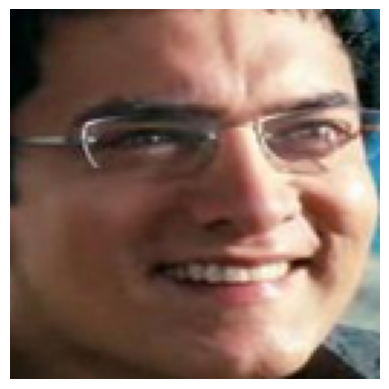

208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted: MIDDLE


In [29]:
import os
import imageio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Index for inspection
idx = 2481
img_name = test.ID[idx]

# Load and show the image
img_path = os.path.join('agedetectiontest/Test', img_name)
img = imageio.imread(img_path)
img_resized = np.array(Image.fromarray(img).resize((128, 128)))
plt.imshow(img_resized)
plt.axis('off')
plt.show()

# Predict
pred_probs = model.predict(test_x)
pred = np.argmax(pred_probs, axis=1)

# Show prediction
print('Predicted:', lb.inverse_transform([pred[idx]])[0])


Age group: MIDDLE


C:\Users\anaswara\AppData\Local\Temp\ipykernel_6536\760201994.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join('agedetectiontrain/Train', img_name))


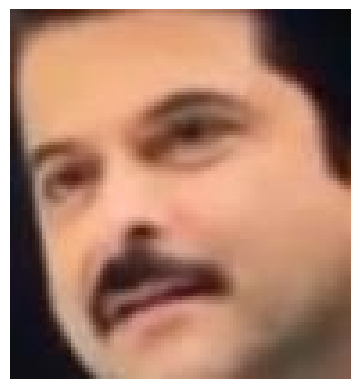

In [30]:
np.random.seed(10)
idx = np.random.choice(train.index)
img_name = train.ID[idx]
img = imageio.imread(os.path.join('agedetectiontrain/Train', img_name))
print('Age group:', train.Class[idx])
plt.imshow(img)
plt.axis('off')
plt.show()
